In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import gsd.hoomd

In [2]:
# Load the data
alpha_a = 0.1
alpha_c = 0.3
target_pf = 0.6

name = f'shape_a_{int(alpha_a * 100)}_c_{int(alpha_c * 100)}'
fname = f'{name}_pf_{target_pf}'

kT = 1.0
bias_sim_info = h5py.File('./data/WTMetaD_log.hdf5','r')['hoomd-data']
print(bias_sim_info.keys())
bias_t = bias_sim_info['t'][:]
acceptance_ratio = bias_sim_info['acceptance_ratio'][:]
cv = bias_sim_info['collective_variable'][:]
bias_pot = bias_sim_info['bias_potential'][:]
ebetac = bias_sim_info['ebetac'][:]

bias_his_info = pd.read_csv('./data/WTMetaD_history.txt', sep='\s+')
t_his = bias_his_info['t']
cv_his = bias_his_info['cv_0(t)']
h_his = bias_his_info['h(t)']

<KeysViewHDF5 ['acceptance_ratio', 'bias_potential', 'collective_variable', 'ebetac', 't']>


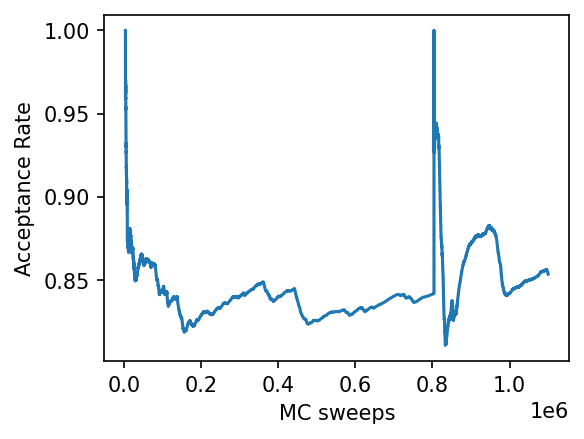

In [5]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
ax.plot(bias_t, acceptance_ratio)
ax.set_xlabel('MC sweeps')
ax.set_ylabel('Acceptance Rate')
plt.show()

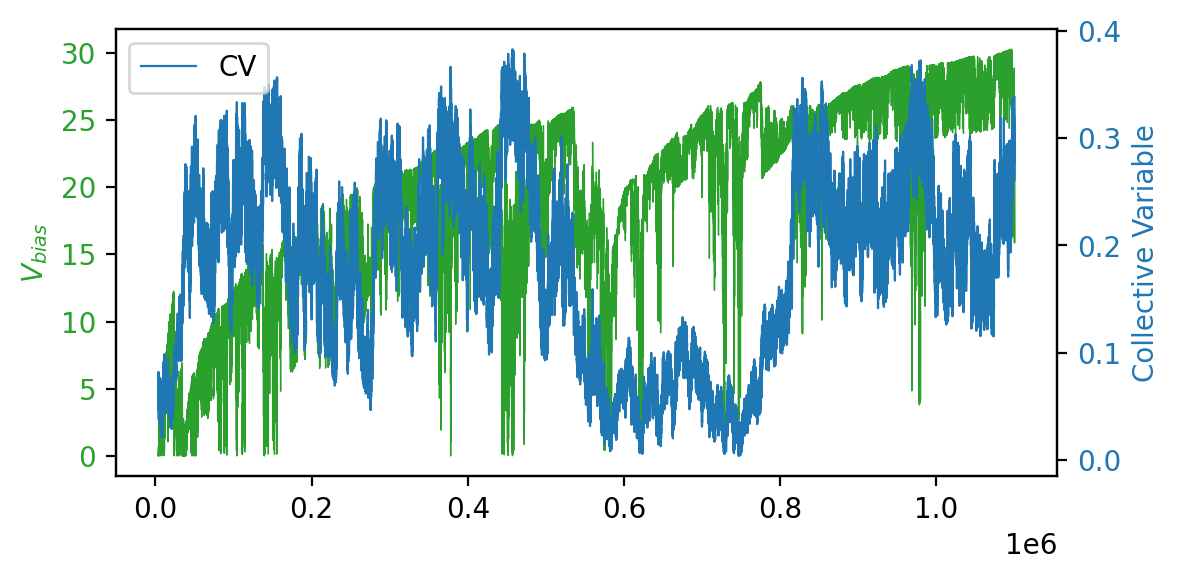

In [6]:
fig, ax2 = plt.subplots(figsize=(6, 3), dpi=200)
ax = ax2.twinx()
ax.plot(bias_t, cv, linewidth=0.8, label='CV')

ax.set_ylabel("Collective Variable", color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.legend(loc='upper left')

ax2.plot(bias_t, bias_pot, linewidth=0.5, color='tab:green')
ax2.set_ylabel("$V_{bias}$", color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax.set_xlabel("MC Sweeps")

plt.tight_layout()
plt.show()

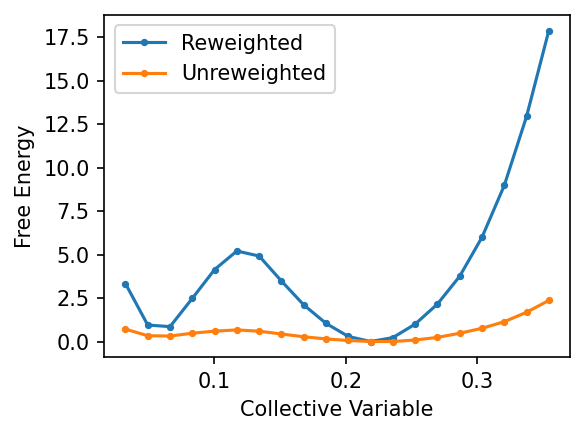

In [8]:
# Plot unreweighted free energy profile side by side for comparison
weights = np.exp(bias_pot/kT) / ebetac
number_bins = 20
hist, bin_edges = np.histogram(cv, bins=number_bins,
                               range=(cv.min() + 0.02, cv.max() - 0.02),
                               density=False, weights=weights)
prob = hist/sum(hist)
mids = 0.5*(bin_edges[1:]+bin_edges[:-1])
freeE = -kT * np.log(prob + 1e-60)
freeE = freeE - freeE.min()

unweighted_hist, unweighted_bin_edges = np.histogram(cv,
                                                     range=(cv.min() + 0.02, cv.max() - 0.02),
                                                     bins=number_bins, density=False)
unweighted_prob = unweighted_hist/sum(unweighted_hist)
unweighted_freeE = -kT * np.log(unweighted_prob + 1e-60)
unweighted_mids = 0.5*(unweighted_bin_edges[1:]+unweighted_bin_edges[:-1])
unweighted_freeE = unweighted_freeE - unweighted_freeE.min()


fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

ax.set_xlabel("Collective Variable")
ax.set_ylabel("Free Energy")
ax.plot(mids, freeE, marker='.', markersize=5, label='Reweighted')
ax.plot(unweighted_mids, unweighted_freeE, marker='.', markersize=5, label='Unreweighted')

ax.legend()

plt.tight_layout()